Loading in the Data
-

In [1]:
library(tidyverse)
library(dplyr)

players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

Data Description
-

'players' data:
- 7 variables
- 196 observations (number of players)

'players' variables:
- 'experience'
    - describes the skill level of the player
    - 14 Pro, 48 Veteran, 36 Regular, 63 Amateur, 35 Beginner
    - categorical
- 'subscribe'
    - describes whether the player is subscribed to the game-related newsletter
    - 144 TRUE, 52 FALSE
    - categorical
- 'hashedEmail'
    - identifies all 196 players each with a unique encrypted code
    - all values are certified unique
    - categorical
- 'played_hours'
    - numerically lists each players total playtime
    - Minimum = 0.00, 1st Quartile = 0.00, Median = 0.10, Mean = 5.85, 3rd Quartile = 0.60, Maximum = 223.10 
    - quantitative
- 'name'
    - name of the player
    - categorical
- 'gender'
    - gender of the player
    - 2 Agender, 37 Female, 124 Male, 15 Non-binary, 1 Other, 11 Prefer not to say, 6 Two-Spirited
    - categorical
- 'Age' - list their respective descriptor of the player - categorical, categorical, quantitative
    - age of the player
    -  Minimum = 9.00, 1st Quartile = 17.00, Median = 19.00, Mean = 21.14, 3rd Quartile = 22.75, Maximum = 58.00, NA's = 2
    -  quantitative

'sessions' data:
- 5 variables
- 1535 observations (number of play sessions)

'sessions' variables:
- 'hashedEmail'
    - identifies the player who played in that session (corresponding to the identified player in the 'hashedEmail' of the 'players' data)
    - categorical
    - 125 unique players had at least 1 session (identified by counting unique hashedEmails
    - Minimum = 1.00, 1st Quartile = 1.00, Median :  1.00, Mean = 12.28, 3rd Quartile = 2.00, Maximum = 310.00 
- 'start_time' and 'end_time'
    - human-readable timestamps of when the player began and ended playing
    - categorical
- 'original_start_time' and 'original_end_time'
    - the unix time stamp (in miliseconds) of when the player began and ended playing
    - quantitative

Potential Issues with the Data
- the unix time stamp was rounded when imported such that it doesn't actualy give you a meaningful start and end time
- the human readable time stamps can't be directly processed with code, they must be converted somehow, but as_datetime() doesn't understand the dd/mm/yyyy format
- there are 2 playes with NA ages
- the hashedEmails which identify each individual player's characteristics are stored separately from the actual sessions (2 separate files)

In [2]:
# 'players' variable summary statistics
count(players, experience)
count(players, subscribe)
players |>
    count(hashedEmail) |>
    arrange(n) |>
    nrow() |>
    head(1) #used to verify all 'hashedEmail' are unique
summary(players$played_hours)
count(players, gender)
summary(players$Age)

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


[1] 196

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.100   5.846   0.600 223.100 

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   17.00   19.00   21.14   22.75   58.00       2 

In [3]:
# 'sessions' variable summary statistics
sessions |>
    count(hashedEmail)|>
    summary(n)

 hashedEmail              n         
 Length:125         Min.   :  1.00  
 Class :character   1st Qu.:  1.00  
 Mode  :character   Median :  1.00  
                    Mean   : 12.28  
                    3rd Qu.:  2.00  
                    Max.   :310.00  

Question
-
Can the number of played hours and number of played sessions predict the likihood of a player being subscribed?

Both the players and the sessions dataset will help answer this question. Players contains both number of played hours of each player and whether or not the player subscribes to the game related newsletter. Sessions will be used to identify unique player sessions based on the hashed email. Sessions data would need to be wrangled by grouping by hashed email, then summarizing by counts of each group (number of sessions played per hashed email). Players data will not need to be wrangled per se, but somehow I'll need to join the tables together based on hashed email.

Exploratory Data Analysis and Visualization
-

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


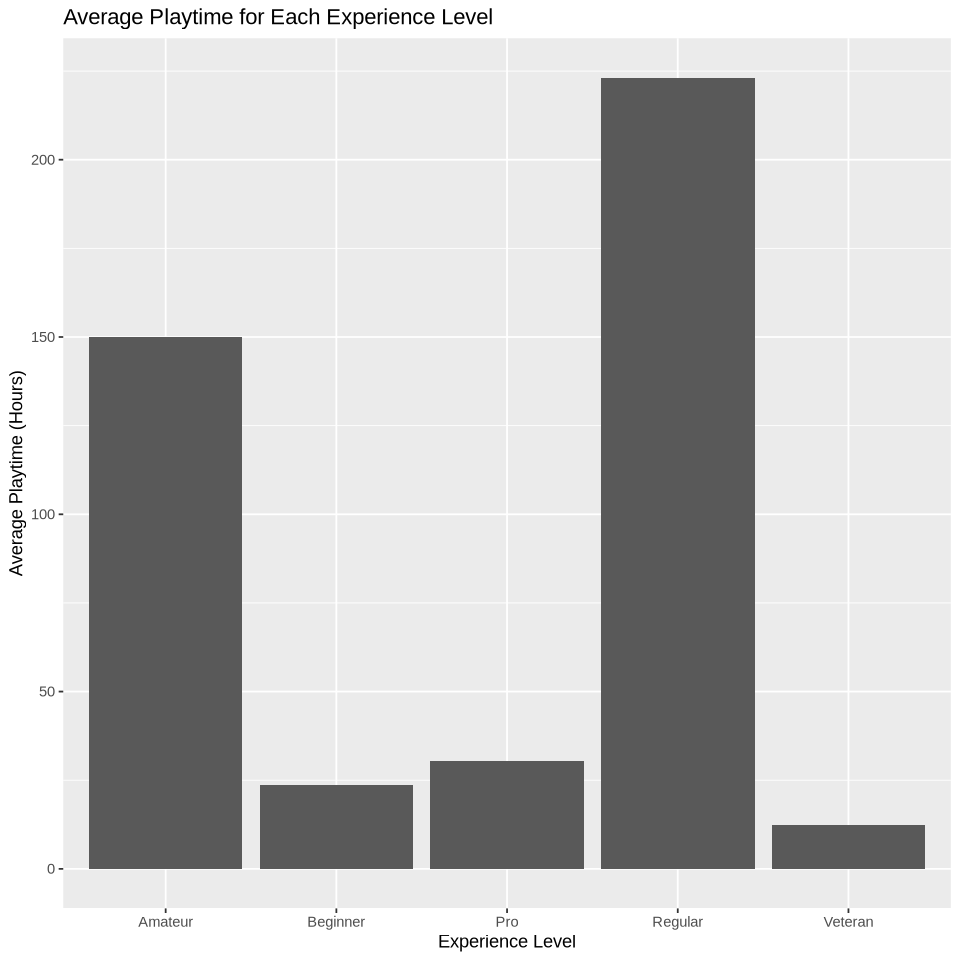

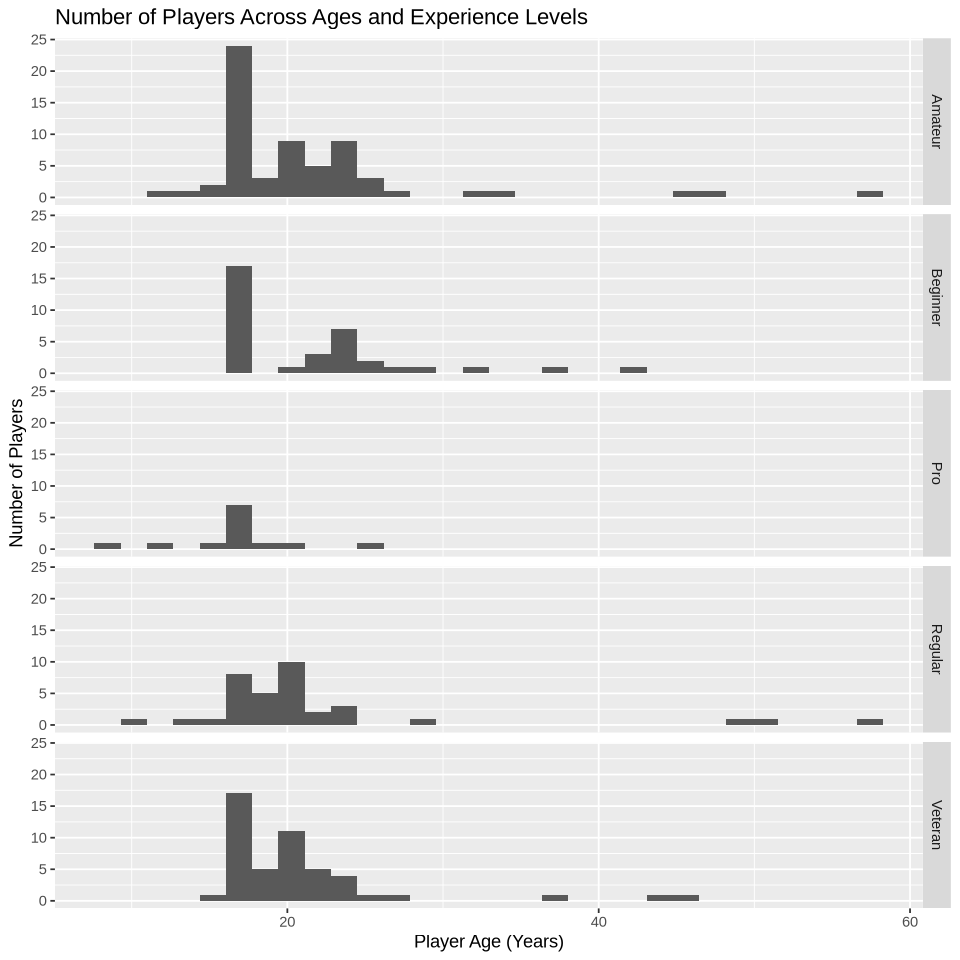

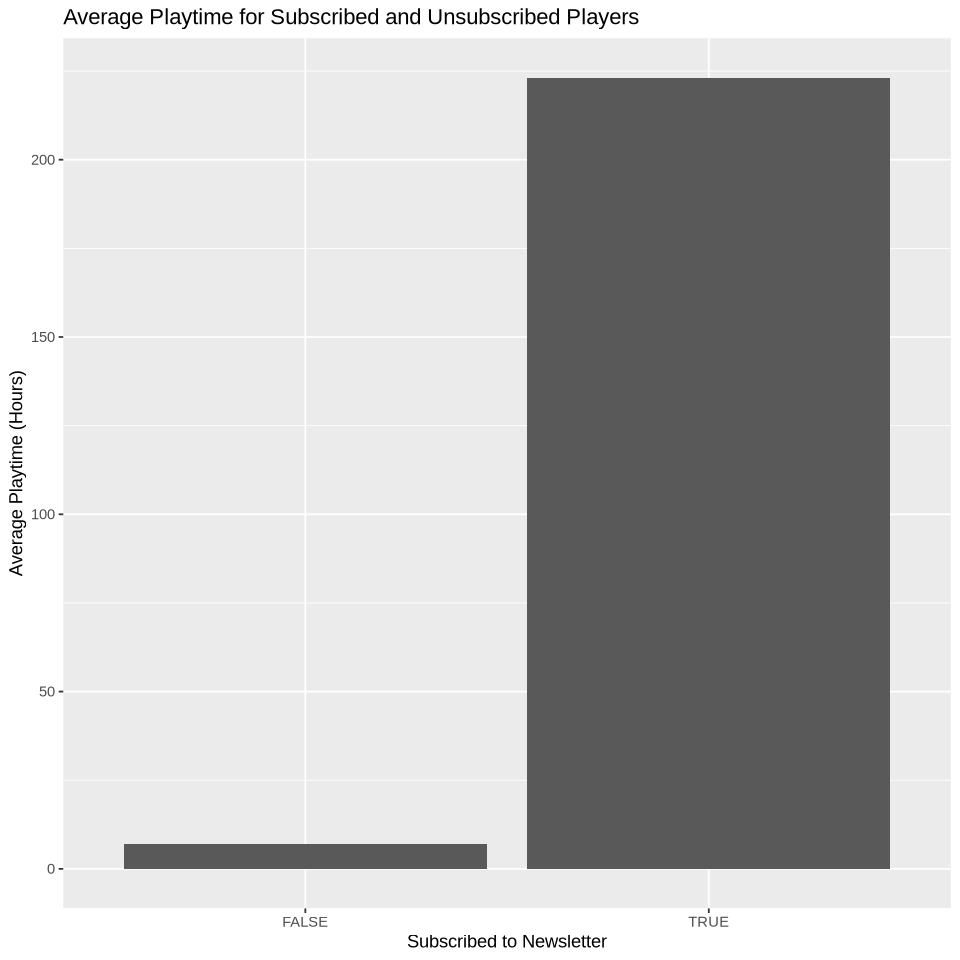

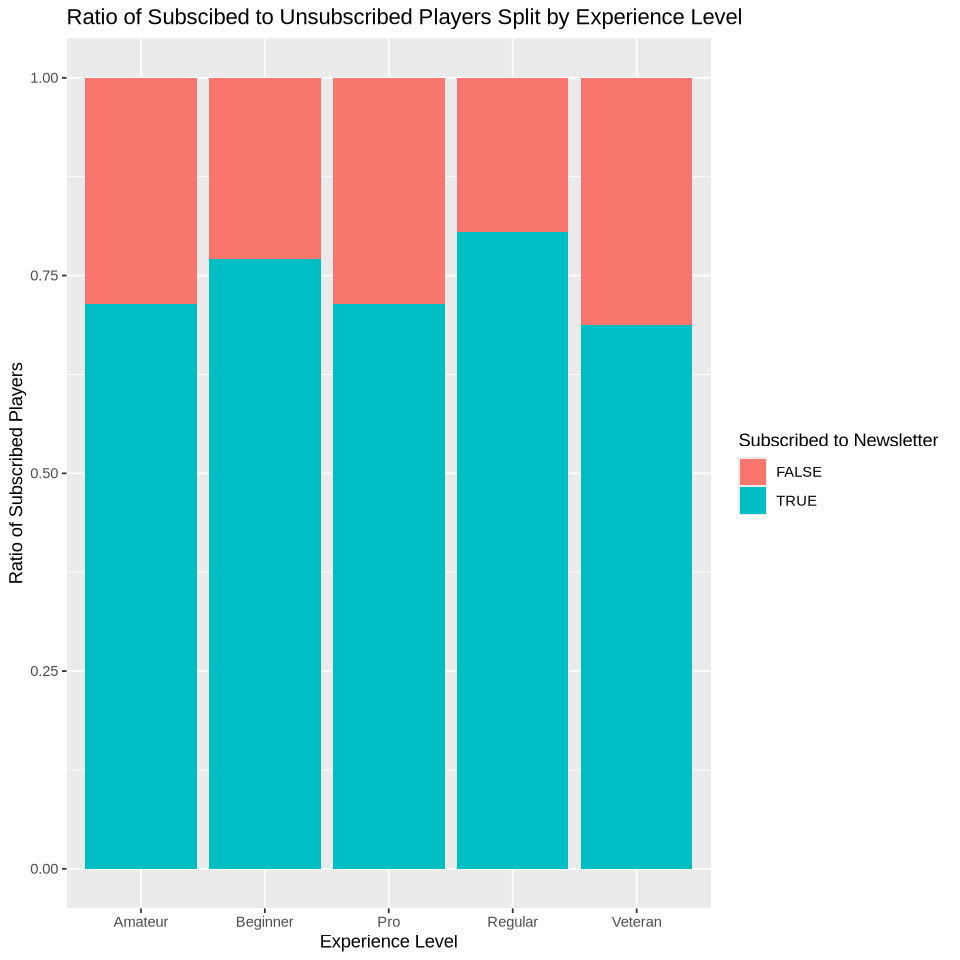

In [33]:
players_quantitative_means <- players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)
players_quantitative_means

options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(players, aes(x = experience, y = played_hours)) +
    geom_bar(position = "dodge", stat = "identity") +
    labs(x = "Experience Level", y = "Average Playtime (Hours)") +
    ggtitle("Average Playtime for Each Experience Level")

ggplot(players, aes(x = Age)) +
    geom_histogram(position = "stack") +
    labs(x = "Player Age (Years)", y = "Number of Players") +
    ggtitle("Number of Players Across Ages and Experience Levels") +
    facet_grid(rows = vars(experience))

ggplot(players, aes(x = subscribe, y = played_hours)) +
    geom_bar(position = "dodge", stat = "identity") +
    labs(x = "Subscribed to Newsletter", y = "Average Playtime (Hours)") +
    ggtitle("Average Playtime for Subscribed and Unsubscribed Players")

ggplot(players, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Experience Level", y = "Ratio of Subscribed Players", fill = "Subscribed to Newsletter") +
    ggtitle("Ratio of Subscibed to Unsubscribed Players Split by Experience Level")

Methods and Plan
-
I intend to use a k nearest neighbors classification to answer my question. This is appropriate because my selected variables are both quantitative and the prediction variable is a binary, categorical variable. The assumptions of this method are that the closer two given standardized points are to each other, the more likely they are to be truely classified the same. I will compare and select the model by tuning the number of neighbors with a training and validation set of the already classified data then evaluate with a test set, all of which will be based on model accuracy. I will process the data using a 5 fold split for validation sets, examine all neighbors between 1 and 25, and use a 75/25 split between the training and test datasets.